In [1]:
tab <- read.table("all_boundaries_400kb_CN-early_cts.bed",h=F,sep="\t")

In [2]:
### Format of the ori counts around TAD boundaries tables:
### ±420 kb windows around start/end TAD coordinates (to obtain ±400 kb windows, the ±20kb account for the boundaries uncertainty)
### V1: chromosome
### V2: bin start (1 bin = 10kb)
### V3: bin end
### V4: TAD boundary unique name tag
### V5: rank of the 10kb-window around a given boundary
### V6: origin counts
head(tab)

,V1,V2,V3,V4,V5,V6
,<fct>,<int>,<int>,<fct>,<fct>,<int>
1,chr1,300000,310000,bound1,1,0
2,chr1,310000,320000,bound1,2,0
3,chr1,320000,330000,bound1,3,0
4,chr1,330000,340000,bound1,4,0
5,chr1,340000,350000,bound1,5,0
6,chr1,350000,360000,bound1,6,0


In [3]:
### Split counts table by boundary
out <- split(tab, f = tab$V4)

In [4]:
### Data frame with cumulative counts
df <- as.data.frame(matrix(0,ncol=1,nrow=84))
for(i in 1:length(out)){
	df <- df+out[[i]]$V6
}

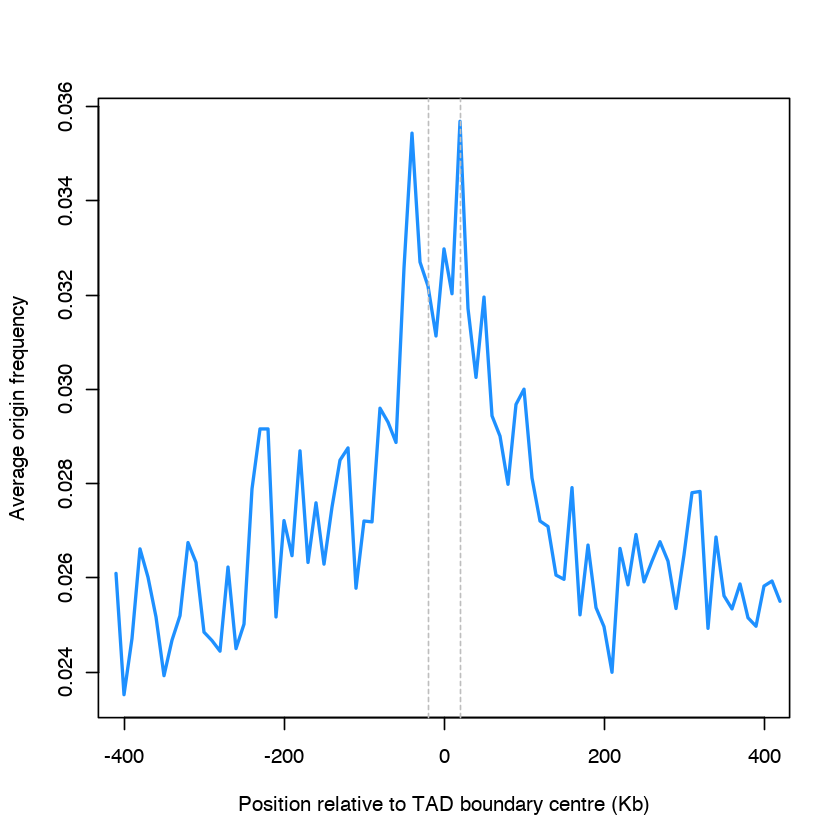

In [5]:
#Plot average frequency
adf <- df/length(out)
len <- seq(-420,420,10)
plot(len,adf$V1,type="l",xlim=c(-400,400),lwd=2,col="dodgerblue",
     xlab="Position relative to TAD boundary centre (Kb)",
     ylab="Average origin frequency")
abline(v=-20, lty=2, col="gray")
abline(v=20, lty=2, col = "gray")